<h2 style='color:#FF0D86'>IMPORTING IMPORTANT LIBRARIES</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style='color:#FF0D86'>LOADING AND EXPLORING THE DATASET</h2>

In [2]:
df=pd.read_csv('BostonHousing.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
df.duplicated().sum()

0

<h2 style='color:#FF0D86'>BOXPLOT VISUALIZATION OF DATASET'S NUMEICAL FEATURES</h2>

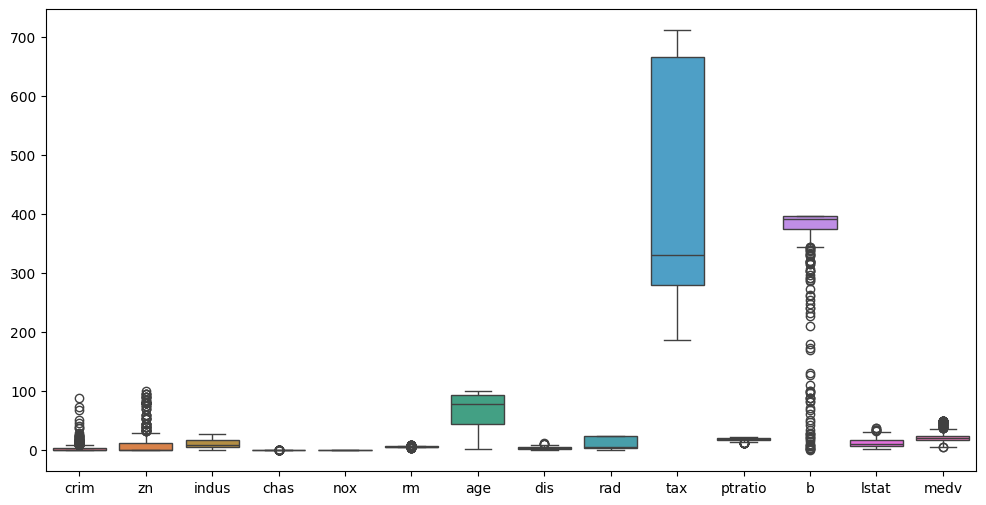

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.show()


<h2 style='color:#FF0D86'>HANDLING SKEWNESS IN FEATURES-APPLYING LOG TRANSFORMATION</h2>

In [9]:
skew_values=df.skew()
skew_values

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403422
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

In [20]:
positively_skewed_features=skew_values[skew_values > 1].index.tolist()
positively_skewed_features

for feature in positively_skewed_features:
    df[feature]=np.log1p(df[feature])

In [21]:
df.skew()

crim       1.269201
zn         1.193451
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403422
age       -0.598963
dis        0.331561
rad        0.532760
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv      -0.241244
dtype: float64

<h2 style='color:#FF0D86'>DETECTING AND HANDLING OUTLIERS IN FEATURES</h2>

<h3 style='color:red'>REMOVING OUTLIERS FROM 'b'</h3>

<Axes: ylabel='b'>

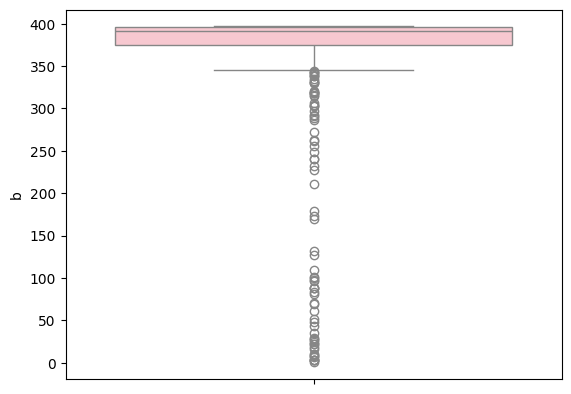

In [23]:
sns.boxplot(df['b'],color='pink')

In [24]:
percentile25=df['b'].quantile(0.25)
percentile75=df['b'].quantile(0.75)

percentile25,percentile75

(375.3775, 396.225)

In [25]:
IQR=percentile75-percentile25
IQR

20.847500000000025

In [26]:
upper_limit=percentile75 + 1.5 * IQR
lower_limit=percentile25 - 1.5 * IQR

upper_limit,lower_limit

(427.49625000000003, 344.10624999999993)

In [27]:
df[df['b'] > upper_limit]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [28]:
df[df['b'] < lower_limit]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
18,0.589291,0.0,8.14,0.0,0.538,5.456,36.6,1.567886,1.609438,307,21.0,288.99,11.69,3.054001
25,0.610059,0.0,8.14,0.0,0.538,5.599,85.7,1.696459,1.609438,307,21.0,303.42,16.51,2.701361
27,0.670784,0.0,8.14,0.0,0.538,6.047,88.8,1.696239,1.609438,307,21.0,306.38,17.28,2.760010
32,0.870452,0.0,8.14,0.0,0.538,5.950,82.0,1.607436,1.609438,307,21.0,232.60,27.71,2.653242
34,0.960430,0.0,8.14,0.0,0.538,6.096,96.9,1.560206,1.609438,307,21.0,248.31,20.34,2.674149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,1.563390,0.0,18.10,0.0,0.655,5.952,84.7,1.353642,3.218876,666,20.2,22.01,17.15,2.995732
467,1.690516,0.0,18.10,0.0,0.584,6.003,94.5,1.264211,3.218876,666,20.2,331.29,21.32,3.000720
475,2.000550,0.0,18.10,0.0,0.584,6.162,97.4,1.165024,3.218876,666,20.2,302.76,24.10,2.660260
489,0.168366,0.0,27.74,0.0,0.609,5.414,98.3,1.013563,1.609438,711,20.1,344.05,23.97,2.079442


In [29]:
new_df=df.copy()
new_df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.006300,2.944439,2.31,0.0,0.538,6.575,65.2,1.627278,0.693147,296,15.3,396.9,4.98,3.218876
1,0.026944,0.000000,7.07,0.0,0.469,6.421,78.9,1.786261,1.098612,242,17.8,396.9,9.14,3.117950


In [30]:
new_df['b']=np.where(
    new_df['b'] > upper_limit,
    upper_limit,
    np.where(
        new_df['b'] < lower_limit,
        lower_limit,
        new_df['b']
    )
)

<Axes: ylabel='b'>

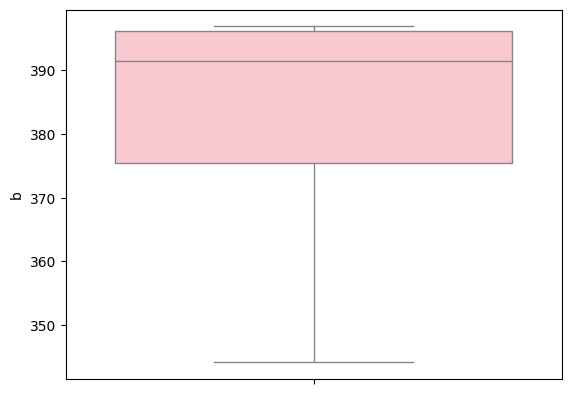

In [31]:
sns.boxplot(new_df['b'],color='pink')

<h3 style='color:red'>REMOVING OUTLIERS FROM 'lstat'</h3>

<Axes: ylabel='lstat'>

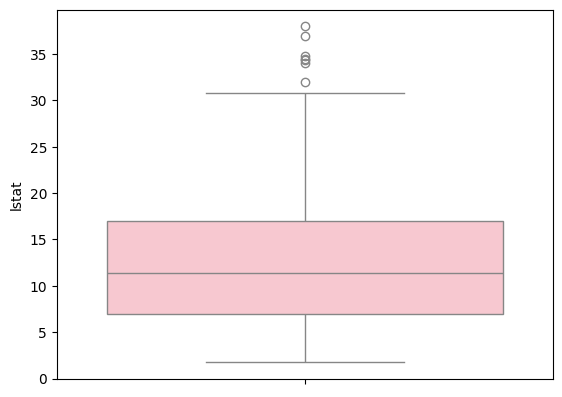

In [32]:
sns.boxplot(df['lstat'],color='pink')

In [33]:
percentile25=df['lstat'].quantile(0.25)
percentile75=df['lstat'].quantile(0.75)

percentile25,percentile75

(6.949999999999999, 16.955000000000002)

In [34]:
IQR=percentile75-percentile25
IQR

10.005000000000003

In [35]:
upper_limit=percentile75 + 1.5 * IQR
lower_limit=percentile25 - 1.5 * IQR

upper_limit,lower_limit

(31.962500000000006, -8.057500000000005)

In [36]:
df[df['lstat'] > upper_limit]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
141,0.966467,0.0,21.89,0.0,0.624,5.019,100.0,0.891752,1.609438,437,21.2,396.90,34.41,2.734368
373,2.493875,0.0,18.10,0.0,0.668,4.906,100.0,0.776661,3.218876,666,20.2,396.90,34.77,2.694627
374,2.970322,0.0,18.10,0.0,0.668,4.138,100.0,0.759403,3.218876,666,20.2,396.90,37.97,2.694627
387,3.161124,0.0,18.10,0.0,0.700,5.000,89.5,0.923624,3.218876,666,20.2,396.90,31.99,2.128232
412,2.986237,0.0,18.10,0.0,0.597,4.628,100.0,0.937622,3.218876,666,20.2,28.79,34.37,2.939162
414,3.844731,0.0,18.10,0.0,0.693,4.519,100.0,0.977649,3.218876,666,20.2,88.27,36.98,2.079442
438,2.686357,0.0,18.10,0.0,0.740,5.935,87.9,1.036950,3.218876,666,20.2,68.95,34.02,2.240710


In [37]:
df[df['lstat'] < lower_limit]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [38]:
new_df['lstat']=np.where(
    new_df['lstat'] > upper_limit,
    upper_limit,
    np.where(
        new_df['lstat'] < lower_limit,
        lower_limit,
        new_df['lstat']
    )
)

<Axes: ylabel='lstat'>

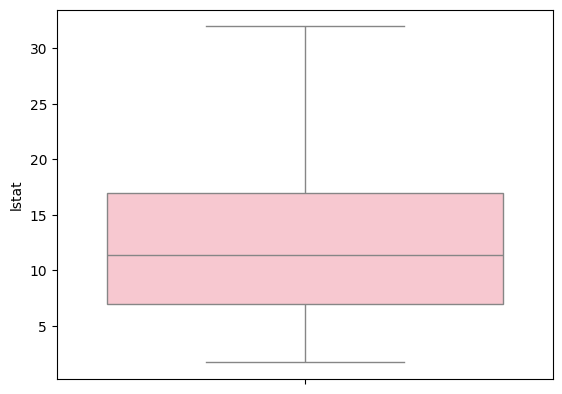

In [39]:
sns.boxplot(new_df['lstat'],color='pink')

<h3 style='color:red'>REMOVING OUTLIERS FROM 'ptratio'</h3>

<Axes: ylabel='ptratio'>

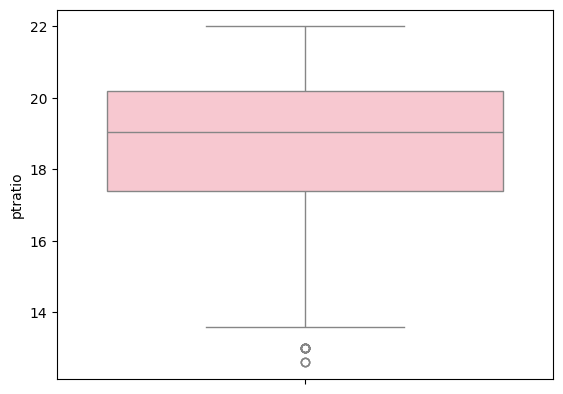

In [40]:
sns.boxplot(df['ptratio'],color='pink')

In [41]:
percentile25=df['ptratio'].quantile(0.25)
percentile75=df['ptratio'].quantile(0.75)

percentile25,percentile75

(17.4, 20.2)

In [42]:
IQR=percentile75-percentile25
IQR

2.8000000000000007

In [43]:
upper_limit=percentile75 + 1.5 * IQR
lower_limit=percentile25 - 1.5 * IQR

upper_limit,lower_limit

(24.4, 13.199999999999998)

In [44]:
df[df['ptratio'] > upper_limit]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [45]:
df[df['ptratio'] < lower_limit]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
196,0.039326,4.394449,1.52,0.0,0.404,7.287,34.1,2.117339,1.098612,329,12.6,396.90,4.08,3.535145
197,0.045604,4.394449,1.52,0.0,0.404,7.107,36.6,2.117339,1.098612,329,12.6,354.31,8.61,3.443618
198,0.036987,4.394449,1.52,0.0,0.404,7.274,38.3,2.117339,1.098612,329,12.6,392.20,6.62,3.572346
257,0.477190,3.044522,3.97,0.0,0.647,8.704,86.9,1.029976,1.791759,264,13.0,389.70,5.12,3.931826
258,0.508930,3.044522,3.97,0.0,0.647,7.333,100.0,1.062847,1.791759,264,13.0,383.29,7.79,3.610918
259,0.504797,3.044522,3.97,0.0,0.647,6.842,100.0,1.102173,1.791759,264,13.0,391.93,6.90,3.437208
260,0.431854,3.044522,3.97,0.0,0.647,7.203,81.8,1.135298,1.791759,264,13.0,392.80,9.59,3.549617
261,0.427957,3.044522,3.97,0.0,0.647,7.520,89.4,1.144159,1.791759,264,13.0,388.37,7.26,3.786460
262,0.418802,3.044522,3.97,0.0,0.647,8.398,91.5,1.190432,1.791759,264,13.0,386.86,5.91,3.908015
263,0.601722,3.044522,3.97,0.0,0.647,7.327,94.5,1.124540,1.791759,264,13.0,393.42,11.25,3.465736


In [46]:
new_df['ptratio']=np.where(
    new_df['ptratio'] > upper_limit,
    upper_limit,
    np.where(
        new_df['ptratio'] < lower_limit,
        lower_limit,
        new_df['ptratio']
    )
)

<Axes: ylabel='lstat'>

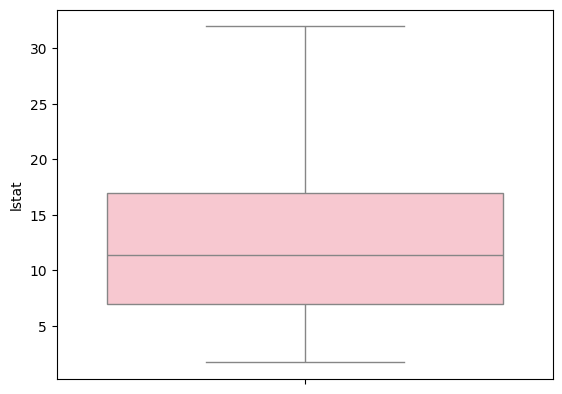

In [47]:
sns.boxplot(new_df['lstat'],color='pink')

<h2 style='color:#FF0D86'>ADDING NEW FEATURE</h2>

In [138]:
new_df['rm_squared']=new_df['rm'] ** 2
new_df['lstat_indus']=new_df['lstat'] * new_df['indus']

<h2 style='color:#FF0D86'>SPLITTING THE DATASET INTO TRAINING AND TESTING SETS</h2>

In [139]:
from sklearn.model_selection import train_test_split

X=new_df.drop(columns=['medv'])
y=new_df['medv']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)



<h2 style='color:#FF0D86'>FEATURE SCALING USING STANDARDIZATION</h2>

In [140]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Converting Back to DataFrame:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)



<h2 style='color:#FF0D86'>CHECKING SUMMARY STATISTICS AND MISSING VALUES AFTER SCALING</h2>

In [141]:
#Checking Summary Statistics
np.round(X_train_scaled.describe(),1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,rm_squared,lstat_indus
count,455.0,455.0,455.0,455.0,455.0,450.0,455.0,455.0,455.0,455.0,455.0,455.0,455.0,450.0,455.0
mean,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.8,-0.6,-1.5,-0.3,-1.5,-3.8,-2.3,-1.7,-1.8,-1.3,-2.4,-2.0,-1.5,-3.0,-1.0
25%,-0.7,-0.6,-0.9,-0.3,-0.9,-0.6,-0.9,-0.8,-0.6,-0.8,-0.7,-0.3,-0.8,-0.6,-0.8
50%,-0.6,-0.6,-0.4,-0.3,-0.1,-0.1,0.3,-0.1,-0.4,-0.5,0.3,0.5,-0.2,-0.2,-0.4
75%,0.7,1.3,1.0,-0.3,0.6,0.5,0.9,0.9,1.6,1.5,0.8,0.7,0.6,0.4,0.7
max,3.6,2.2,2.4,3.7,2.7,3.5,1.1,2.6,1.6,1.8,1.6,0.8,2.8,4.0,4.0


In [142]:
#Checking for Missing Values:
print(X_train_scaled.isnull().sum())
print(X_test_scaled.isnull().sum())

crim           0
zn             0
indus          0
chas           0
nox            0
rm             5
age            0
dis            0
rad            0
tax            0
ptratio        0
b              0
lstat          0
rm_squared     5
lstat_indus    0
dtype: int64
crim           0
zn             0
indus          0
chas           0
nox            0
rm             0
age            0
dis            0
rad            0
tax            0
ptratio        0
b              0
lstat          0
rm_squared     0
lstat_indus    0
dtype: int64


<h2 style='color:#FF0D86'>HANDLING MISSING VALUES USING MEAN IMUPTATION</h2>

In [143]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='mean')
X_train_scaled=pd.DataFrame(imputer.fit_transform(X_train_scaled),columns=X_train_scaled.columns)
X_test_scaled=pd.DataFrame(imputer.transform(X_test_scaled),columns=X_test_scaled.columns)

In [144]:
print(X_train_scaled.isnull().sum())
print(X_test_scaled.isnull().sum())

crim           0
zn             0
indus          0
chas           0
nox            0
rm             0
age            0
dis            0
rad            0
tax            0
ptratio        0
b              0
lstat          0
rm_squared     0
lstat_indus    0
dtype: int64
crim           0
zn             0
indus          0
chas           0
nox            0
rm             0
age            0
dis            0
rad            0
tax            0
ptratio        0
b              0
lstat          0
rm_squared     0
lstat_indus    0
dtype: int64


<H2 style='color:#FF0D86'>TRAINING THE REGRESSION MODEL</H2>

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr=LinearRegression()

lr.fit(X_train_scaled,y_train)
cv=cross_val_score(lr,X_train_scaled,y_train,cv=5,scoring='r2')
y_pred=lr.predict(X_test_scaled)



<h2 style='color:#FF0D86'>EVALUATE THE MODEL</h2>

In [146]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Cross-Validation R² Scores: {cv}")
print(f"Mean Squared Error: {mse}")
print(f"r2 Score: {r2}")

Cross-Validation R² Scores: [0.75192837 0.79352076 0.76667989 0.82116932 0.74569121]
Mean Squared Error: 0.013464243783914389
r2 Score: 0.8716715693640429
